# Setup and Fetch Data

Press the play button in Google Colab or press `Shift+Enter` execute the cell below to download and load the data and packages for this assignment

This will load four `pandas` `DataFrame` objects: `shampoo`,`housing`, `airline`, and `airline_series`.
Each of these is used in Makridakis Chapter 3, as well as the `can_opener` data used in Makridakis Chapter 4. 

In [ ]:
import pandas as pd
from numpy import log, abs, mean, exp
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16

!curl https://raw.githubusercontent.com/ZacharySBrown/vcu-scma440-2021q1/master/utils/fetch_e4.sh > fetch_e4.sh
!bash fetch_e4.sh

# Example
shampoo = pd.read_csv('shampoo_sales.csv', parse_dates=['date']).set_index('date')
housing = pd.read_csv('housing_sales.csv', parse_dates=['date']).set_index('date')
airline = pd.read_csv('airline.csv').set_index('year')
airline_series = pd.read_csv('airline_series.csv', parse_dates=['date']).set_index('date')
can_openers = pd.read_csv('can_openers.csv', parse_dates=['month']).set_index('month')

!pip install -U statsmodels

from IPython.display import display_html
def restartkernel() :
  print("restarting kernel to reflect package installation")
  display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

restartkernel()

from statsmodels.tsa.seasonal import STL

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   586  100   586    0     0   8253      0 --:--:-- --:--:-- --:--:--  8253
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   629  100   629    0     0   6988      0 --:--:-- --:--:-- --:--:--  6988
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3867  100  3867    0     0  48337      0 --:--:-- --:--:-- --:--:-- 48337
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   456  100   456    0     0   5010      0 --:--:-- --:--:-- --:--:--  5010
  % Total    % Received % Xferd  Average Speed   Tim

# 1: STL Decomposition

1. Create an STL decomposition of the `airline_series` data, plot, and compute the MSE (`(results.resid**2).mean()`)

2. Redo the decomposition with `robust=False`, replot, and calculate the MSE. Is the MSE better or worse with robustness turned off?


In [1]:
# YOUR CODE HERE

stl = STL(
    endog=airline_series, 
    period=12, 
    seasonal=7,
    seasonal_deg=0, 
    trend_deg=0,
    robust=True,
    )
results = stl.fit()
results.plot()

mse = (results.resid**2).mean()

print(f'Mean Squared Error: {mse}')

NameError: name 'STL' is not defined

Mean Squared Error: 50.00713253649389


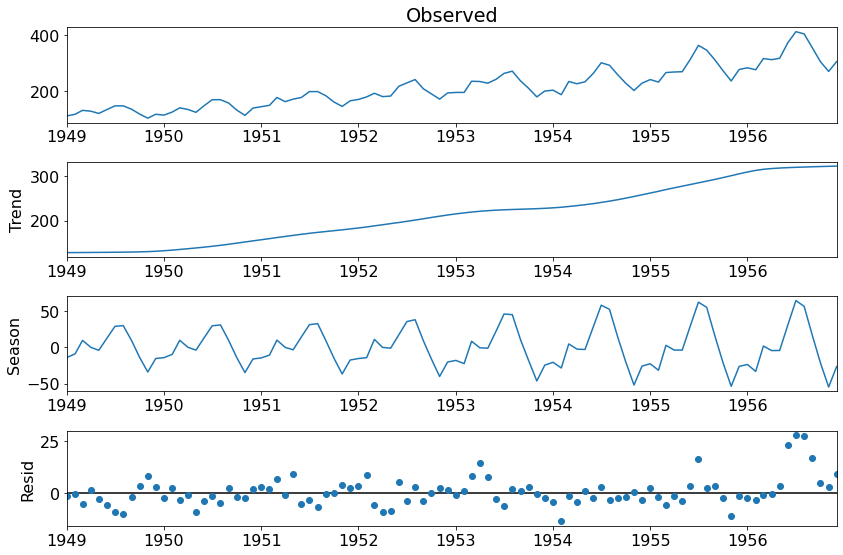

In [16]:
# YOUR CODE HERE

stl = STL(
    endog=airline_series, 
    period=12, 
    seasonal=7,
    seasonal_deg=0, 
    trend_deg=0,
    robust=False,
    )
results = stl.fit()
results.plot()

mse = (results.resid**2).mean()

print(f'Mean Squared Error: {mse}')

# 2: Running and Moving Average Forecasts

For the `airline_series` data:

1. Compute a running average (`running_average`), and two moving average **MA(k)** _forecasts_, for `k=3` and for `k=5`

2. Plot all three forecasts

For the `can_opener` data,  do the same. 

Are either of these methods reasonable for these data sets?


,passengers,running_average,MA3,MA5
date,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,112.000000,NaN,NaN
1949-03-01,132,115.000000,NaN,NaN
1949-04-01,129,120.666667,120.666667,NaN
1949-05-01,121,122.750000,126.333333,NaN
1949-06-01,135,122.400000,127.333333,122.4
1949-07-01,148,124.500000,128.333333,127.0
1949-08-01,148,127.857143,134.666667,133.0
1949-09-01,136,130.375000,143.666667,136.2


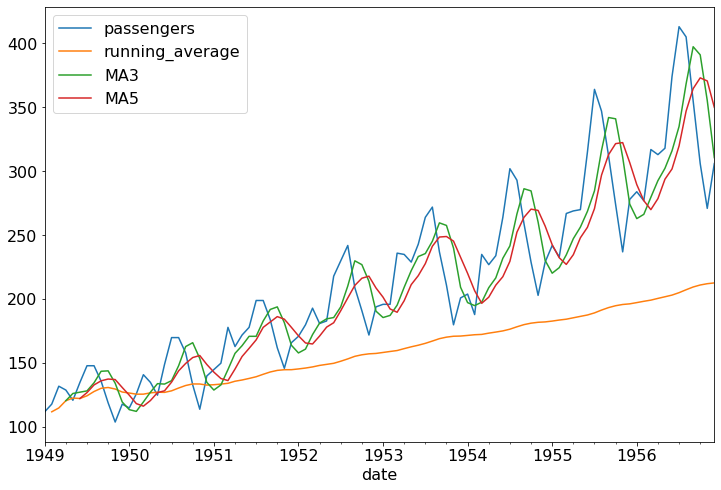

In [20]:
# YOUR CODE HERE

airline_series['running_average'] = airline_series['passengers'].expanding().mean().shift(1)
airline_series['MA3'] = airline_series['passengers'].rolling(3, center=True).mean().shift(2)
airline_series['MA5'] = airline_series['passengers'].rolling(5, center=True).mean().shift(3)

display(airline_series.head(10))
airline_series.plot()

,shipments,running_average,MA3,MA5
month,,,,
2020-01-01,200,NaN,NaN,NaN
2020-02-01,135,200.000000,NaN,NaN
2020-03-01,195,167.500000,NaN,NaN
2020-04-01,197,176.666667,176.666667,NaN
2020-05-01,310,181.750000,175.666667,NaN
2020-06-01,175,207.400000,234.000000,207.4
2020-07-01,155,202.000000,227.333333,202.4
2020-08-01,130,195.285714,213.333333,206.4
2020-09-01,220,187.125000,153.333333,193.4


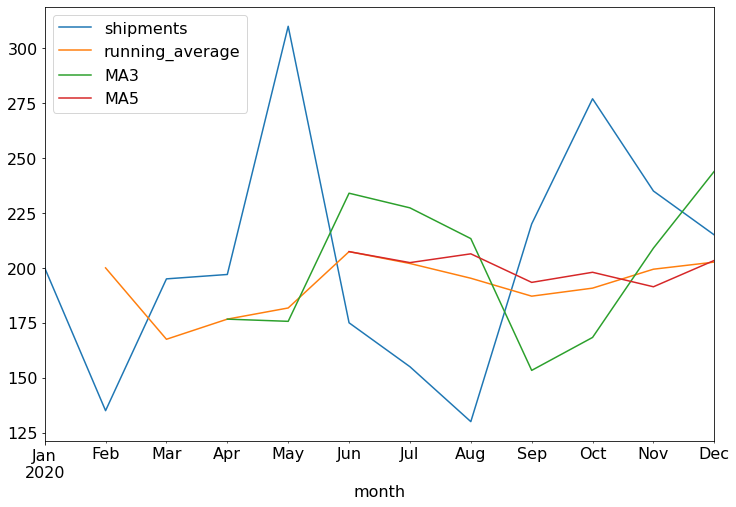

In [23]:
# YOUR CODE HERE

can_openers['running_average'] = can_openers['shipments'].expanding().mean().shift(1)
can_openers['MA3'] = can_openers['shipments'].rolling(3, center=True).mean().shift(2)
can_openers['MA5'] = can_openers['shipments'].rolling(5, center=True).mean().shift(3)

display(can_openers.head(10))
can_openers.plot()

# 3: Single Exponential Smoothing

For the `airline_series` data:

1. Compute and plot an exponential smoother with several different values, and plot (use the first value of the data as the initial forecast level)
2. Compute the MSE for each of the smoothers. Which one is the best?

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:1103: FutureWarning: Setting initial values during fit is deprecated and will be removed after 0.13. These should be set during model initialization.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:830: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  warnings.warn(message, EstimationWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:830: EstimationWarning: Model has no free parameters to estimate. Set optimized=Fal

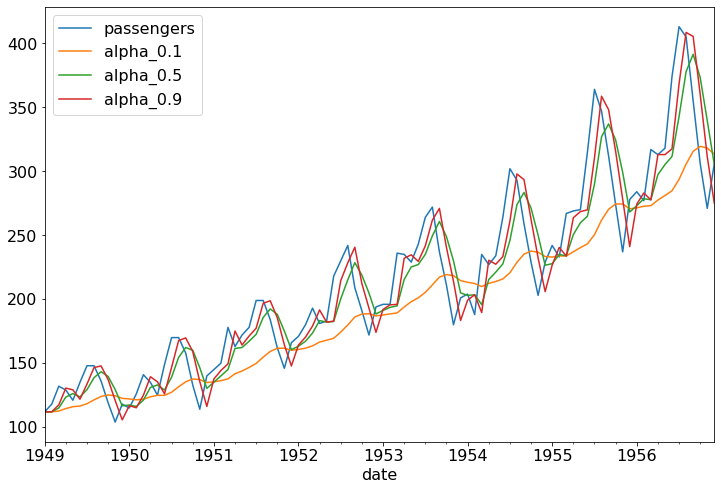

In [35]:
# YOUR CODE HERE

# Reload a fresh copy of our data
airline_series = pd.read_csv('airline_series.csv', parse_dates=['date']).set_index('date')

initial_level = airline_series['passengers'][0]

smoother = SimpleExpSmoothing(airline_series['passengers'])
results_1 = smoother.fit(smoothing_level=0.1, initial_level=initial_level)
results_5 = smoother.fit(smoothing_level=0.5, initial_level=initial_level)
results_9 = smoother.fit(smoothing_level=0.9, initial_level=initial_level)
airline_series['alpha_0.1'] = results_1.fittedvalues
airline_series['alpha_0.5'] = results_5.fittedvalues
airline_series['alpha_0.9'] = results_9.fittedvalues

airline_series.plot()

In [34]:
# YOUR CODE HERE

mse_1 = ((airline_series['alpha_0.1'] - airline_series['passengers'])**2).mean()
mse_5 = ((airline_series['alpha_0.5'] - airline_series['passengers'])**2).mean()
mse_9 = ((airline_series['alpha_0.9'] - airline_series['passengers'])**2).mean()

print(mse_1, mse_5, mse_9)

1408.8370705006685 782.7354286546157 569.6353873043245
